In [1]:
import torchvision
import torchvision.transforms as transforms

In [2]:
from models.model_architecture import Model

In [3]:
model = Model()

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
from PIL import Image
import cv2

In [7]:
def read_digit(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img = 255 - img
    img = np.abs(img)
    
    row_sum = img.sum(axis=1)
    col_sum = img.sum(axis=0)
    
    x_min = 0
    for i in range(len(col_sum)):
        if col_sum[i] > 255 : 
            x_min = i
            break
            
    x_max = img.shape[1]
    for i in range(len(col_sum)-1, 0, -1):
        if col_sum[i] > 255 : 
            x_max = i
            break
            
    y_min = 0
    for i in range(len(row_sum)):
        if row_sum[i] > 255 : 
            y_min = i
            break
            
    y_max = img.shape[0]
    for i in range(len(row_sum)-1, 0, -1):
        if row_sum[i] > 255 : 
            y_max = i
            break
    space = 10
    if x_min >= space : 
        x_min -= space
    if x_max + space < len(col_sum):
        x_max += space
    c_img = img[y_min:y_max, x_min:x_max]
    
    c_img = cv2.resize(c_img, (28,28), interpolation = cv2.INTER_AREA)
    return c_img 

read from file test_data/test_digit_0.png


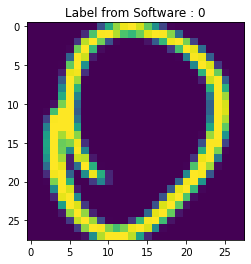

read from file test_data/test_digit_1.png


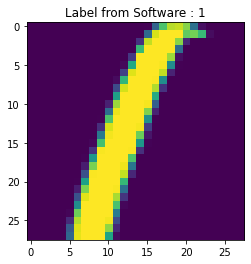

read from file test_data/test_digit_2.png


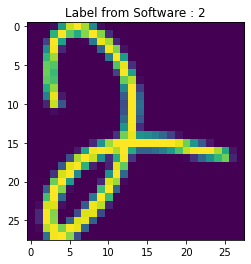

read from file test_data/test_digit_3.png


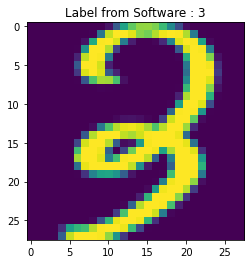

read from file test_data/test_digit_4.png


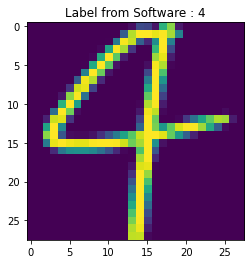

read from file test_data/test_digit_5.png


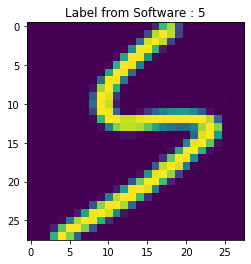

read from file test_data/test_digit_6.png


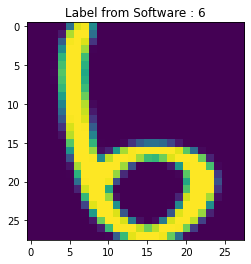

read from file test_data/test_digit_7.png


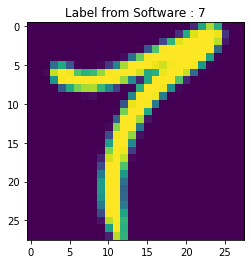

read from file test_data/test_digit_8.png


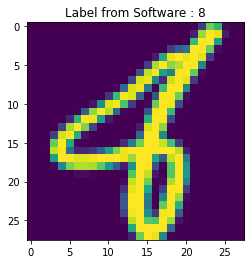

read from file test_data/test_digit_9.png


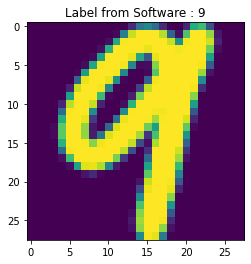

In [8]:
for i in range(10):
    file = f'test_data/test_digit_{i}.png'
    print("read from file", file)
    digit_img = read_digit(file)
    result = model.predict(digit_img.reshape((1,1,28,28)))
    plt.title(f'Label from Software : {result[0]}')
    plt.imshow(digit_img)
    plt.show()
    